# Analysing PSO on the Rastrigin function

The Rastrigin function is a non-convex function often used as a performance test problem for optimization algorithms. It is a typical example of non-linear multimodal function. Finding the minimum of this function is a fairly difficult problem due to its large search space and its large number of local minima. 

On an n-dimensional domain it is defined by: 

$ f(x) = An + \sum_{i-1}^{n}[x_i^2 - A \cos(2\pi x_i)]$
    
where $A=10$ and $x_i \in [-5.12, 5.12]$.

It has a global minimum at $x=0$ where $f(x)=0$.


We will consider the case of two variables:

![](Rastrigin_function.png)

In this notebook we want to analyse the PSO algorithm by first applying it to the Rastrigin function, then trying to visualize the process and at the end comparing it with Nelder Mead. We will focus particularly on the relation between different hyperparameter settings and the probability of PSO being stuck in a local minimum.

## Particle Swarm Optimization
### Optimization

In [3]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

# Import PySwarms
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx

%load_ext autoreload
%autoreload 2

In [60]:
%%time

# Set up hyperparameters:
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}
## c1 = cognitive parameter (follow its personal best position)
## c2 = social parameter    (follow the swarm's global best position)
## w = inertia parameter    (controls the inertia of the swarm's movement)

# Call instance of PSO:
optimizer = ps.single.GlobalBestPSO(n_particles=20, 
                                    dimensions=2,
                                    bounds=[(-5.12, -5.12), (5.12, 5.12)],
                                    options=options,
                                    init_pos=None)
                                    ## (None: generate the particles randomly)

# Perform optimization:
cost, pos = optimizer.optimize(objective_func=fx.rastrigin, 
                               iters=50)

2020-06-22 21:20:29,983 - pyswarms.single.global_best - INFO - Optimize for 50 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|50/50, best_cost=0.00374
2020-06-22 21:20:30,297 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.003735473829642899, best pos: [-0.00430759 -0.00052394]
CPU times: user 113 ms, sys: 27.9 ms, total: 141 ms
Wall time: 323 ms


### Cost History Plot

In [61]:
# Import plotting tool for optimizer analysis
from pyswarms.utils.plotters import plot_cost_history

# Import class to format plots
from pyswarms.utils.plotters.formatters import Designer

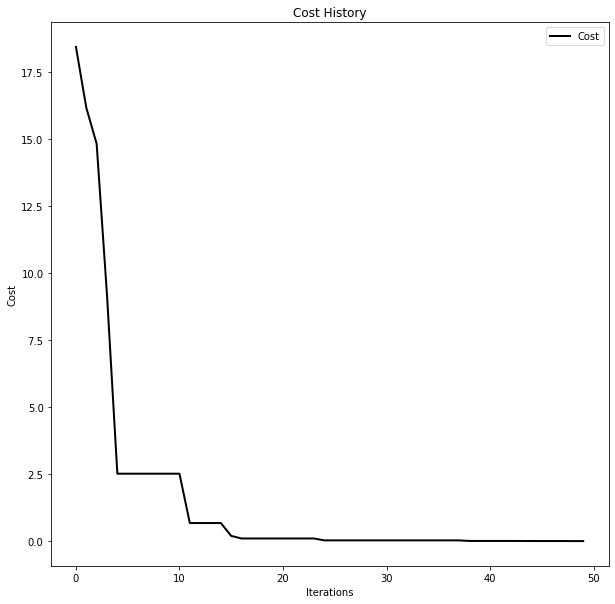

In [62]:
#Create designer for specifying the plot's formatting and design
cost_history_designer = Designer(figsize=(10,10),                  
                            title_fontsize='large',
                            text_fontsize='medium',
                            legend='Cost',
                            label=['Iterations','Cost'],
                            limits=[(0, 50),(0, 80)],
                            colormap=plt.cm.viridis)

# Create a simple line plot with the cost in the y-axis and the iteration at the x-axis
plot_cost_history(cost_history=optimizer.cost_history,
                  ax=None,
                  title='Cost History',
                  designer=cost_history_designer )
plt.show()

### Visualization


In [63]:
# Import plotting tools for optimizer analysis
from pyswarms.utils.plotters.plotters import (plot_contour, plot_surface)

# Import classes to format plots and create meshes
from pyswarms.utils.plotters.formatters import (Animator, Designer, Mesher)

#### Contour Plot in 2D

In [64]:
#Create designer for specifying the plot's formatting and design
contour_designer = Designer(figsize=(10,10),                  
                            title_fontsize='large',
                            text_fontsize='medium',
                            legend='Cost',
                            label=['x-axis','y-axis'],
                            limits=[(-5.12, 5.12),(-5.12, 5.12)],
                            colormap=plt.cm.viridis)

In [65]:
# Create mesher class for plotting contours of objective functions
contour_mesher = Mesher(func=fx.rastrigin,
                        delta=0.001,                            
                        limits=[(-5.12, 5.12),(-5.12,5.12)],
                        levels=np.arange(-2.0, 80.0, 4.0),
                        alpha=0.3)

In [66]:
# Create animator for specifying animation behavior
contour_animator = Animator(interval=480,
                            repeat_delay=120,
                            repeat=True)     

In [67]:
%%capture

# Make animation in 2D
animation_2d = plot_contour(pos_history=optimizer.pos_history,
                         canvas=None,
                         title="Contour Plot",
                         mark=(0.0, 0.0),
                         designer=contour_designer,
                         mesher=contour_mesher,
                         animator=contour_animator)

In [68]:
# Create a gif of the 2D animation
animation_2d.save('gif_contour_plot.gif', writer='imagemagick', fps=5)
Image(url='gif_contour_plot.gif')

2020-06-22 21:21:38,034 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.ImageMagickWriter'>
2020-06-22 21:21:38,036 - matplotlib.animation - INFO - MovieWriter._run: running command: convert -size 720x720 -depth 8 -delay 20.0 -loop 0 rgba:- gif_contour_plot.gif


#### Surface Plot in 3D

In [69]:
#Create designer for specifying the plot's formatting and design
surface_designer = Designer(figsize=(20,20),                  
                            title_fontsize='large',
                            text_fontsize='medium',
                            legend='Cost',
                            label=['x-axis','y-axis', 'cost'],
                            limits=[(-5.12, 5.12),(-5.12, 5.12), (-2.0, 80)],
                            colormap=plt.cm.viridis)

In [70]:
# Create mesher class for plotting contours of objective functions
surface_mesher = Mesher(func=fx.rastrigin,
                        delta=0.001,                            
                        limits=[(-5.12, 5.12),(-5.12,5.12), (-2.0, 80)],
                        levels=np.arange(-2.0, 80.0, 4.0),
                        alpha=0.3)

In [71]:
# Create animator for specifying animation behavior
surface_animator = Animator(interval=480,
                            repeat_delay=60,
                            repeat=True)

In [72]:
# Obtain a position-fitness matrix 
pos_history_3d = surface_mesher.compute_history_3d(optimizer.pos_history)

In [73]:
%%capture

# Make animation in 3D
animation_3d = plot_surface(pos_history=pos_history_3d,
                           canvas=None,
                           title='Surface Plot',
                           mark=(0,0,0),
                           designer=surface_designer, 
                           mesher=surface_mesher,
                           animator=surface_animator)

In [74]:
# Create a gif of the 3D animation
animation_3d.save('gif_surface_plot.gif', writer='imagemagick', fps=5)
Image(url='gif_surface_plot.gif')

2020-06-22 21:23:27,435 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.ImageMagickWriter'>
2020-06-22 21:23:27,441 - matplotlib.animation - INFO - MovieWriter._run: running command: convert -size 1440x1440 -depth 8 -delay 20.0 -loop 0 rgba:- gif_surface_plot.gif
